In [14]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Настройка отображения графиков прямо в ноутбуке
%matplotlib inline


In [15]:
# Загружаем датасет (проверь, что файл S02-hw-dataset.csv лежит в HW02)
df = pd.read_csv("S02-hw-dataset.csv")

# Показать первые 5 строк
df.head()


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [16]:
# Типы данных, пропуски и размерность
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [17]:
# Базовые описательные статистики
df.describe()


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [18]:
# Количество пропусков
df.isna().sum()

# Доля пропусков в процентах
df.isna().mean() * 100


user_id      0.000000
age          4.878049
country      0.000000
purchases    0.000000
revenue      0.000000
dtype: float64

In [19]:
# Сколько дублирующихся строк
df.duplicated().sum()

# Посмотреть дубли, если есть
df[df.duplicated()]


,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [20]:
# Отрицательные покупки
df[df["purchases"] < 0]

# Нереалистичный возраст (>100 лет)
df[df["age"] > 100]

# Нулевая выручка при наличии покупок
df[(df["purchases"] > 0) & (df["revenue"] == 0)]

# Выручка < 0 (на всякий случай)
df[df["revenue"] < 0]


,user_id,age,country,purchases,revenue


In [21]:
# Создаем возрастные группы
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 18, 35, 50, 100, 200],
    labels=["0–18", "19–35", "36–50", "51–100", "100+"]
)


In [22]:
# Посмотрим, сколько пользователей в каждой возрастной группе
df["age_group"].value_counts()


age_group
19–35     21
36–50      9
51–100     6
0–18       2
100+       1
Name: count, dtype: int64

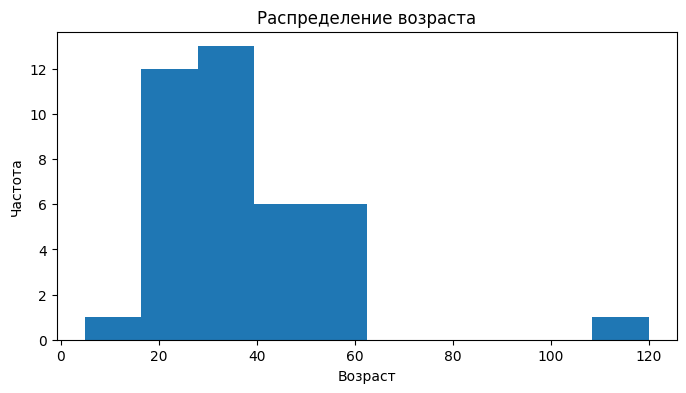

In [23]:
plt.figure(figsize=(8,4))
plt.hist(df["age"], bins=10)
plt.title("Распределение возраста")
plt.xlabel("Возраст")
plt.ylabel("Частота")
plt.savefig("figures/age_hist.png")  # Сохраняем график
plt.show()


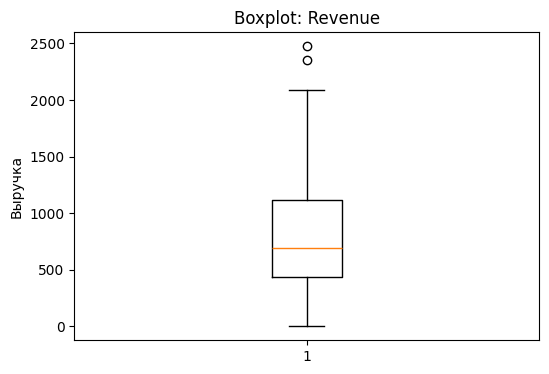

In [24]:
plt.figure(figsize=(6,4))
plt.boxplot(df["revenue"])
plt.title("Boxplot: Revenue")
plt.ylabel("Выручка")
plt.savefig("figures/revenue_boxplot.png")
plt.show()


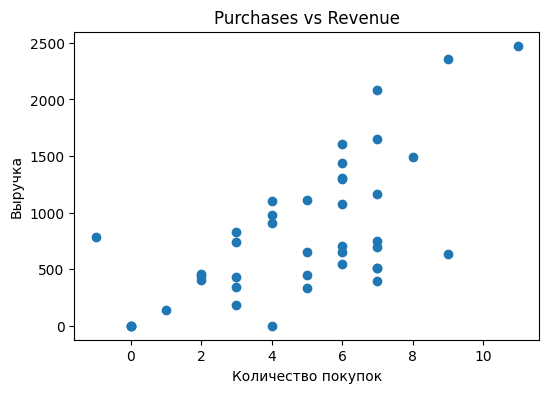

In [25]:
plt.figure(figsize=(6,4))
plt.scatter(df["purchases"], df["revenue"])
plt.title("Purchases vs Revenue")
plt.xlabel("Количество покупок")
plt.ylabel("Выручка")
plt.savefig("figures/purchases_vs_revenue.png")
plt.show()
